# Admin

In [1]:
from dataclasses import dataclass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy.spatial.distance import squareform

import Calibration_Function as CF

In [ ]:
# Note Calibration_Function contains the following functions, Calibration_Fitter doesn't work yet (I need to swap the x and y values around), Full_Calibration simply fuses the two calibration functions together and therefore by extension doesnt fully work either:
#
#  def chi_squared(model_params,
#                  model,
#                  x_data,
#                  y_data,
#                  y_error):
#     -> chi_squared for the data
#
#
# def reduced_chi_squared(Chi_squared,
#                         DoF):
#     -> reduced chi squared
#
#
# def Calibration_Index(file_name,
#                       sheet_names,
#                       column_names)
#     -> mean peak indexes, uncertainty on the peak indexes
#
# def Calibration_Fitter(model,
#                        p0_model,
#                        start_index,
#                        wavelengths,
#                        mean_indexes,
#                        uncertainties):
#   -> popt_model, cov_model
#
# def Full_Calibration(file_name,
#                      sheet_names,
#                      column_names,
#                      model,
#                      p0_model,
#                      start_index,
#                      wavelengths):
#   -> popt_model, cov_model, mean_indexes, uncertainties

# Data Processing

In [51]:
wavelengths = [632.8, #Red
               594.1, #Orange
               543.5, #Green
               405, #Blue
]

start_indexes = [6980, #Red
                 6935, #Orange
                 6890, #Green
                 6344, #Blue
                 ]

sheets = ['Red',
          'Orange',
          'Green',
          'Blue']

cols = [
    ['R_A_0','R_A_1', 'R_A_2', 'R_A_3', 'R_A_4', 'R_A_5','R_A_6','R_A_7','R_A_8','R_A_9'], #Red
    ['O_A_0','O_A_1','O_A_2','O_A_3','O_A_4','O_A_5','O_A_6','O_A_7','O_A_8','O_A_9'],# Orange
    ['G_A_0','G_A_1','G_A_2','G_A_3','G_A_4'], #Green
    ['B_A_0','B_A_1','B_A_2','B_A_3','B_A_4'] #Blue
]
file = "Calibration_Runs.xlsx"

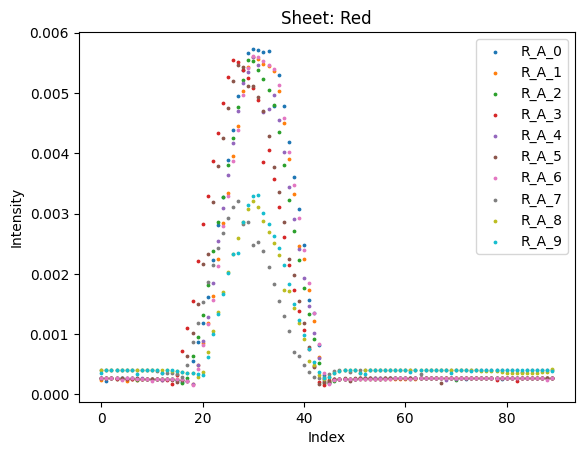

----- Results -----
Sheet 'Red': mean peak index = 29.0
----- ----- -----


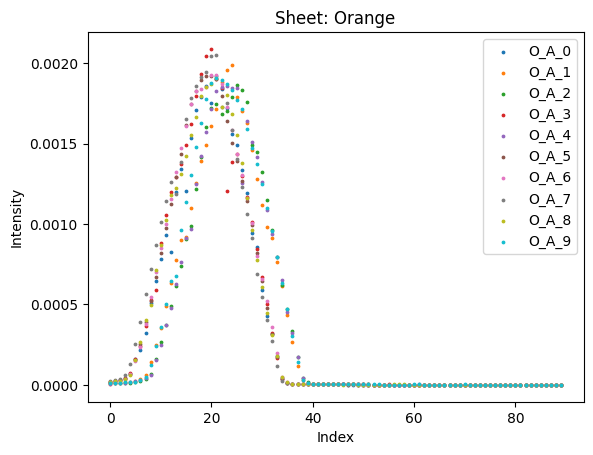

----- Results -----
Sheet 'Orange': mean peak index = 21.6
----- ----- -----


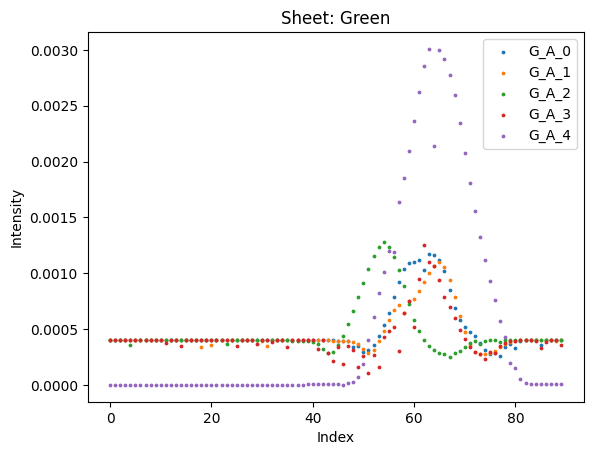

----- Results -----
Sheet 'Green': mean peak index = 61.4
----- ----- -----


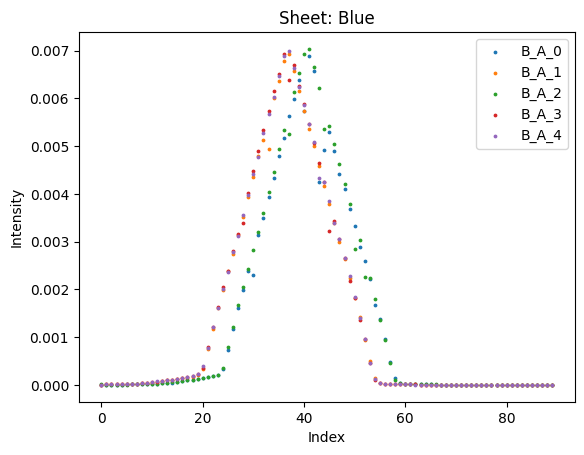

----- Results -----
Sheet 'Blue': mean peak index = 38.4
----- ----- -----


In [52]:
# CF.Full_Calibration(file_name=file,
#                  sheet_names=sheets,
#                  column_names=cols,
#                  model=model,
#                  p0_model=p0_model,
#                  start_index=6350,
#                  wavelengths=wavelengths
#                  )

mean_peak, uncertainty = CF.Calibration_Index(file_name= file,
                     sheet_names= sheets,
                     column_names= cols)

In [66]:
indexes = start_indexes - 0.1*np.array(mean_peak)
print(indexes)
print(uncertainty)

def model(x, A, B):
    return A + x*B

p0_model =[5100,3]


popt_model, cov_model = curve_fit(
        model,
        wavelengths,
        indexes,
        sigma= uncertainty,
        absolute_sigma=True,
        p0=p0_model
    )

wavelengths = np.array(wavelengths)


chi2_model = CF.chi_squared(model = model,
                            model_params = popt_model,
                            x_data= wavelengths,
                            y_data = indexes,
                            y_error= uncertainty)

dof = len(wavelengths)-len(popt_model)

rchi2_model = CF.reduced_chi_squared(Chi_squared = chi2_model,
                                     DoF= dof)

print(wavelengths)

[6977.1  6932.84 6883.86 6340.16]
[np.float64(0.5099019513592785), np.float64(0.5513619500836088), np.float64(1.7111399708965949), np.float64(0.9633275663033838)]
[632.8 594.1 543.5 405. ]


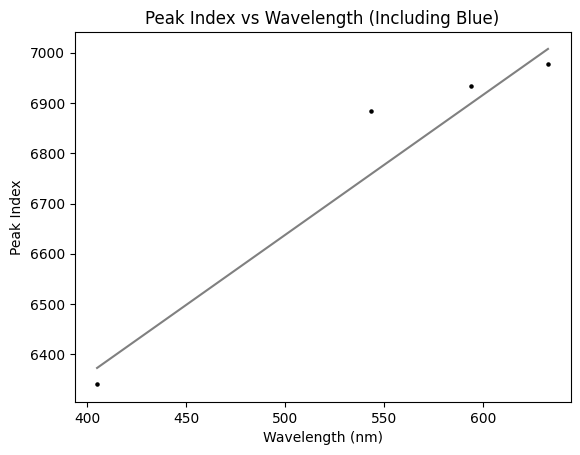

----- Results -----
The reduced chi squared is 6835.895329984022
----- ----- -----


In [72]:
plt.figure(1)
plt.plot(wavelengths,model(wavelengths, popt_model[0], popt_model[1]),label='Peak Index', color = 'grey')
plt.scatter(wavelengths,indexes,label='Peak Index', s = 5, color = 'black')
plt.errorbar(wavelengths,indexes,yerr=uncertainty,fmt= 'none',color='black')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Peak Index')
plt.title('Peak Index vs Wavelength (Including Blue)')

plt.show()

print("----- Results -----")
print(f"The reduced chi squared is {rchi2_model}")
print("----- ----- -----")